# Swan-multi-class

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv(r'C:\Users\hp\Desktop\Projects\train.csv')

# Explore Data

In [7]:
data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
data.sample()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
14795,14795,Male,21.0,1.67,75.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Automobile,Overweight_Level_I


In [10]:
data.shape

(20758, 18)

In [9]:
data.duplicated().sum()

0

In [11]:
data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [13]:
data.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

<Axes: >

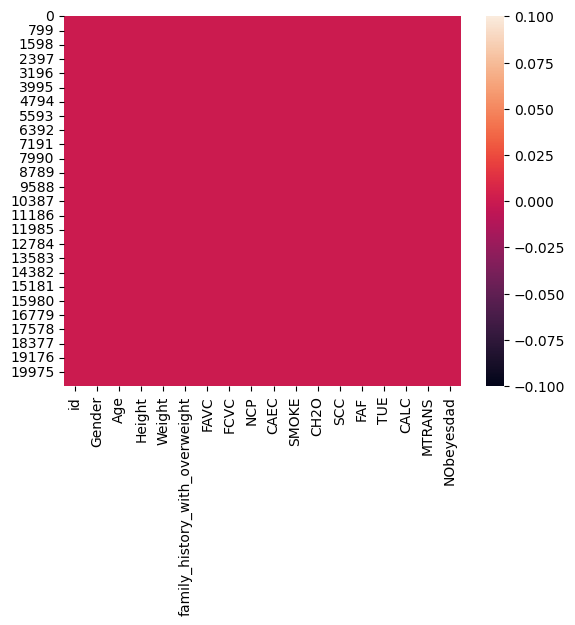

In [15]:
sns.heatmap(data.isnull())

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [19]:
data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


# Trasform-Data

In [21]:
la=LabelEncoder()

In [23]:
obj=data.select_dtypes(include='object')
non_obj=data.select_dtypes(exclude='object')
for i in range(0,obj.shape[1]):
    obj.iloc[:,i]=la.fit_transform(obj.iloc[:,i])
    

In [25]:
obj

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,1,1,1,2,0,0,1,3,6
1,0,1,1,1,0,0,2,0,1
2,0,1,1,2,0,0,2,3,0
3,0,1,1,2,0,0,1,3,4
4,1,1,1,2,0,0,1,3,6
...,...,...,...,...,...,...,...,...,...
20753,1,1,1,2,0,0,1,3,3
20754,1,0,1,1,0,0,1,3,0
20755,1,1,1,2,0,0,2,3,3
20756,1,1,1,2,0,0,2,0,6


In [27]:
non_obj

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473
1,1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000
2,2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584
3,3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199
4,4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721
...,...,...,...,...,...,...,...,...,...
20753,20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680
20754,20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000
20755,20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439
20756,20756,33.852953,1.700000,83.520113,2.671238,1.971472,2.144838,0.000000,0.973834


In [29]:
obj=obj.astype('int')

In [31]:
df=pd.concat([obj,non_obj],axis=1)

In [33]:
data =df.interpolate(method='linear')
df

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1,1,1,2,0,0,1,3,6,0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473
1,0,1,1,1,0,0,2,0,1,1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000
2,0,1,1,2,0,0,2,3,0,2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584
3,0,1,1,2,0,0,1,3,4,3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199
4,1,1,1,2,0,0,1,3,6,4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1,1,1,2,0,0,1,3,3,20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680
20754,1,0,1,1,0,0,1,3,0,20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000
20755,1,1,1,2,0,0,2,3,3,20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439
20756,1,1,1,2,0,0,2,0,6,20756,33.852953,1.700000,83.520113,2.671238,1.971472,2.144838,0.000000,0.973834


In [35]:
test=pd.read_csv(r'C:\Users\hp\Desktop\Projects\test.csv')

In [37]:
obj=test.select_dtypes(include='object')
non_obj=test.select_dtypes(exclude='object')
for i in range(0,obj.shape[1]):
    obj.iloc[:,i]=la.fit_transform(obj.iloc[:,i])
    

In [39]:
obj=obj.astype('int')

In [41]:
df=pd.concat([obj,non_obj],axis=1)
test =df.interpolate(method='linear')
df

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1,1,1,2,0,0,2,3,20758,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000
1,0,1,1,2,0,0,2,3,20759,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000
2,0,1,1,2,0,0,2,3,20760,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502
3,1,1,1,2,0,0,2,3,20761,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000
4,0,1,1,2,0,0,2,3,20762,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,1,1,0,2,0,0,2,3,34593,23.327836,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632
13836,0,0,1,2,0,0,2,3,34594,29.000000,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000
13837,0,0,1,1,0,0,2,3,34595,22.935612,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000
13838,1,1,1,2,0,0,3,3,34596,21.000000,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000


In [43]:
sc=StandardScaler()

In [45]:
scal1=data[['Age']]
scal2=data[['Height']]
data['Age']=sc.fit_transform(scal1)
data['Height']=sc.fit_transform(scal2)

In [47]:
data.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1,1,1,2,0,0,1,3,6,0,0.105699,-0.002828,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473
1,0,1,1,1,0,0,2,0,1,1,-1.027052,-1.606291,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000
2,0,1,1,2,0,0,2,3,0,2,-1.027052,0.128451,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584
3,0,1,1,2,0,0,1,3,4,3,-0.507929,0.120090,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199
4,1,1,1,2,0,0,1,3,6,4,1.371197,2.450367,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721


In [49]:
scal1=test[['Age']]
scal2=test[['Height']]
test['Age']=sc.fit_transform(scal1)
test['Height']=sc.fit_transform(scal2)

In [51]:
test.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1,1,1,2,0,0,2,3,20758,0.508163,1.682789,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000
1,0,1,1,2,0,0,2,3,20759,-0.509128,-1.114658,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000
2,0,1,1,2,0,0,2,3,20760,0.353000,-0.626191,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502
3,1,1,1,2,0,0,2,3,20761,-0.512705,-1.642760,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000
4,0,1,1,2,0,0,2,3,20762,0.353000,-0.805996,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069


# Create Model

In [115]:
x=data.drop(['NObeyesdad','id'],axis=1)
y=data['NObeyesdad']

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [119]:
model1=LogisticRegression()
model2=RandomForestClassifier()
model3=GaussianNB()
model4=SVC()
model5=DecisionTreeClassifier()
model6=GradientBoostingClassifier()

In [121]:
Algorithm=['LogisticRegression','RandomForestClassifier','GaussianNB','SVC','DecisionTreeClassifier','GradientBoostingClassifier']
R2=[]
RMSE=[]

In [123]:
def models(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    rmse=np.sqrt(mean_squared_error(y_test,pre))
    R2.append(r2)
    RMSE.append(rmse)
    score=model.score(x_test,y_test)
    print(f"the score of model is :{score}")

In [125]:
models(model1)
models(model2)  
models(model3)
models(model4)  
models(model5)
models(model6)

the score of model is :0.7227842003853564
the score of model is :0.9065510597302505
the score of model is :0.6637764932562621
the score of model is :0.7620423892100193
the score of model is :0.8513969171483622
the score of model is :0.9094412331406551


In [127]:
df=pd.DataFrame({'Algorithm':Algorithm,'R2_score':R2,'Rmse':RMSE})
df

,Algorithm,R2_score,Rmse
0,LogisticRegression,0.351649,1.528944
1,RandomForestClassifier,0.788448,0.873364
2,GaussianNB,0.218318,1.678809
3,SVC,0.431941,1.431143
4,DecisionTreeClassifier,0.654182,1.116633
5,GradientBoostingClassifier,0.798935,0.851441


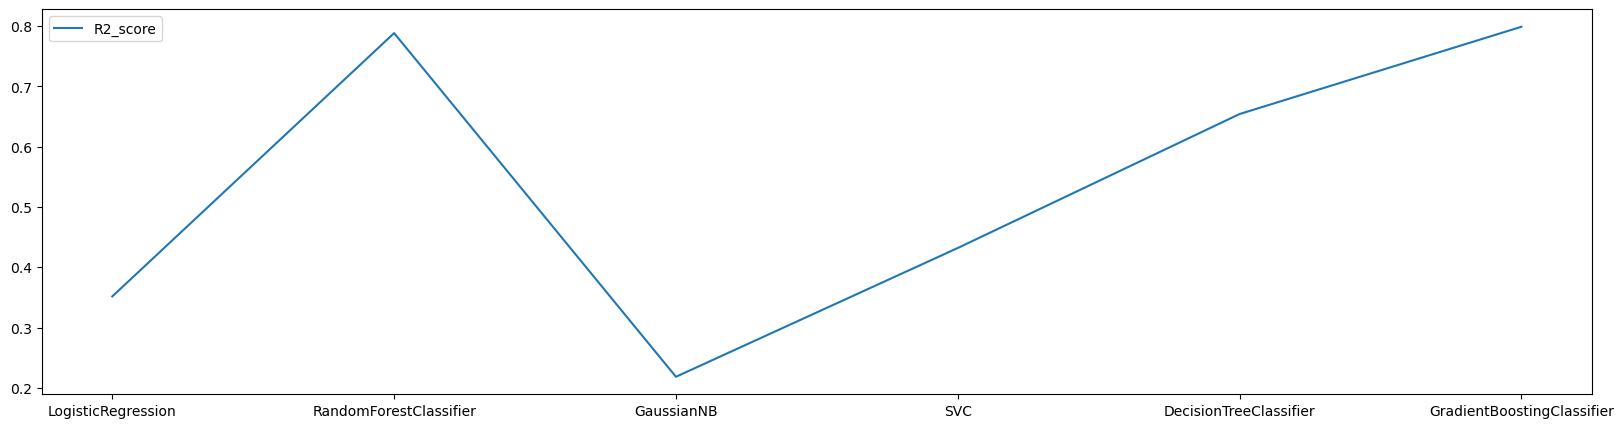

In [141]:
fig,sx=plt.subplots(figsize=(20,5))
plt.plot(df.Algorithm,df.R2_score,label='R2_score')
plt.legend()
plt.show()

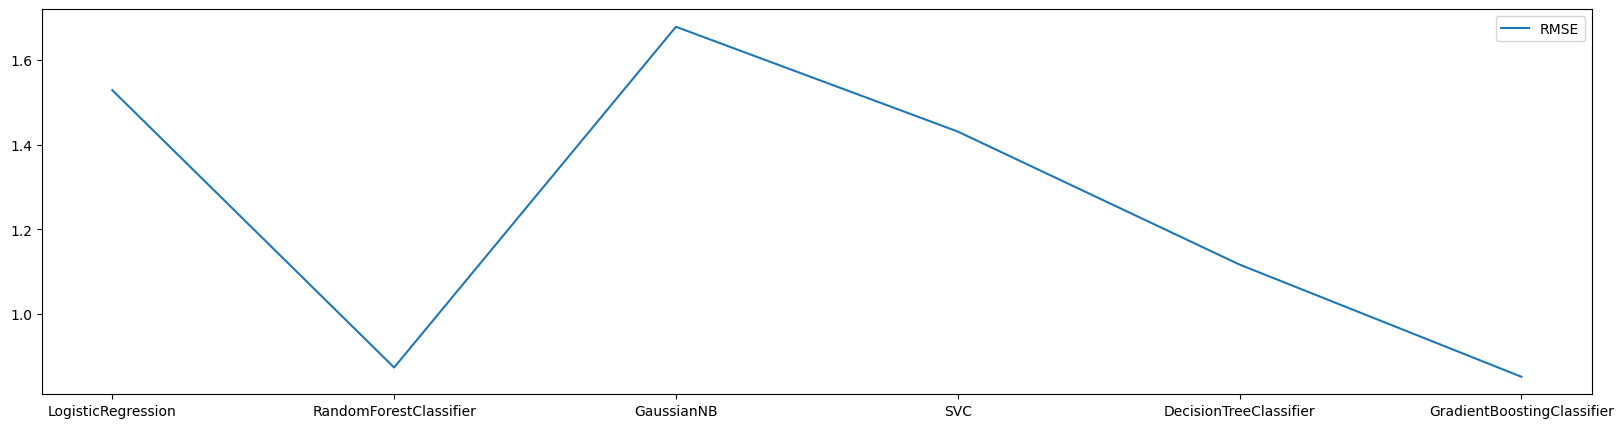

In [145]:
fig,sx=plt.subplots(figsize=(20,5))
plt.plot(df.Algorithm,df.Rmse,label='RMSE')
plt.legend()
plt.show()